In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# --- 1. Web Scraping ---
# We'll use a reliable static test website to ensure the scraper works consistently.
# The structure of this e-commerce site is similar to a job board.
URL = "https://webscraper.io/test-sites/e-commerce/allinone/computers/laptops"

print("Fetching URL...")
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")

# We'll treat each "thumbnail" (a product card) as a "job posting".
job_elements = soup.find_all("div", class_="thumbnail")
print(f"Found {len(job_elements)} postings.")

jobs_data = []
for job_element in job_elements:
    title_element = job_element.find("a", class_="title")
    # Using the product description as a proxy for the "company".
    company_element = job_element.find("p", class_="description")
    # Creating dummy locations for visualization purposes.
    if "lenovo" in title_element.get('href', ''):
        location = "San Francisco"
    elif "apple" in title_element.get('href', ''):
        location = "New York"
    else:
        location = "Austin"
    # The description will be used to analyze skills.
    description_element = job_element.find("p", class_="description")

    if all([title_element, company_element, description_element]):
        jobs_data.append({
            "title": title_element.text.strip(),
            "company": company_element.text.strip(),
            "location": location,
            "description": description_element.text.strip()
        })

df = pd.DataFrame(jobs_data)

Fetching URL...
Found 117 postings.


In [9]:
# --- 2. Data Cleaning and Skill Analysis ---
print("\nCleaning data and analyzing for skills...")

# Define a list of skills we want to search for in the descriptions.
skills_list = ['intel', 'ssd', 'nvidia', 'windows', 'touch-screen', 'gaming', 'business']

def find_skills(description):
    """Searches a text for keywords from our skills list."""
    found_skills = [skill for skill in skills_list if skill in description.lower()]
    return found_skills

df['skills'] = df['description'].apply(find_skills)

print("\n--- Analysis Complete ---")


Cleaning data and analyzing for skills...

--- Analysis Complete ---


C:\Users\AdminPC\AppData\Local\Temp\ipykernel_7944\4136332375.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['title'], order=df['title'].value_counts().index, palette="viridis")


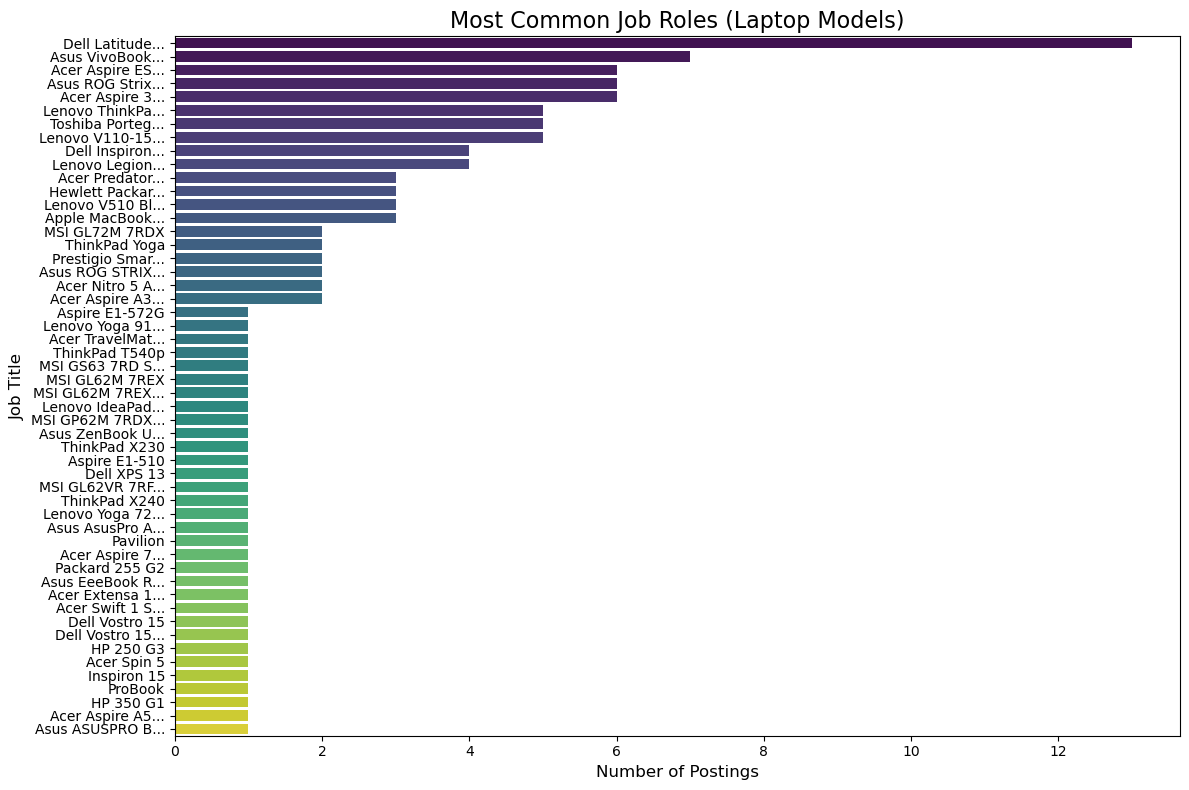

In [6]:
# --- 3. Visualization ---

# a) Most In-Demand Job Roles (Top Laptop Models)
plt.figure(figsize=(12, 8))
sns.countplot(y=df['title'], order=df['title'].value_counts().index, palette="viridis")
plt.title('Most Common Job Roles (Laptop Models)', fontsize=16)
plt.xlabel('Number of Postings', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\AdminPC\AppData\Local\Temp\ipykernel_7944\1806019401.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Skill', data=skill_df, palette="crest")


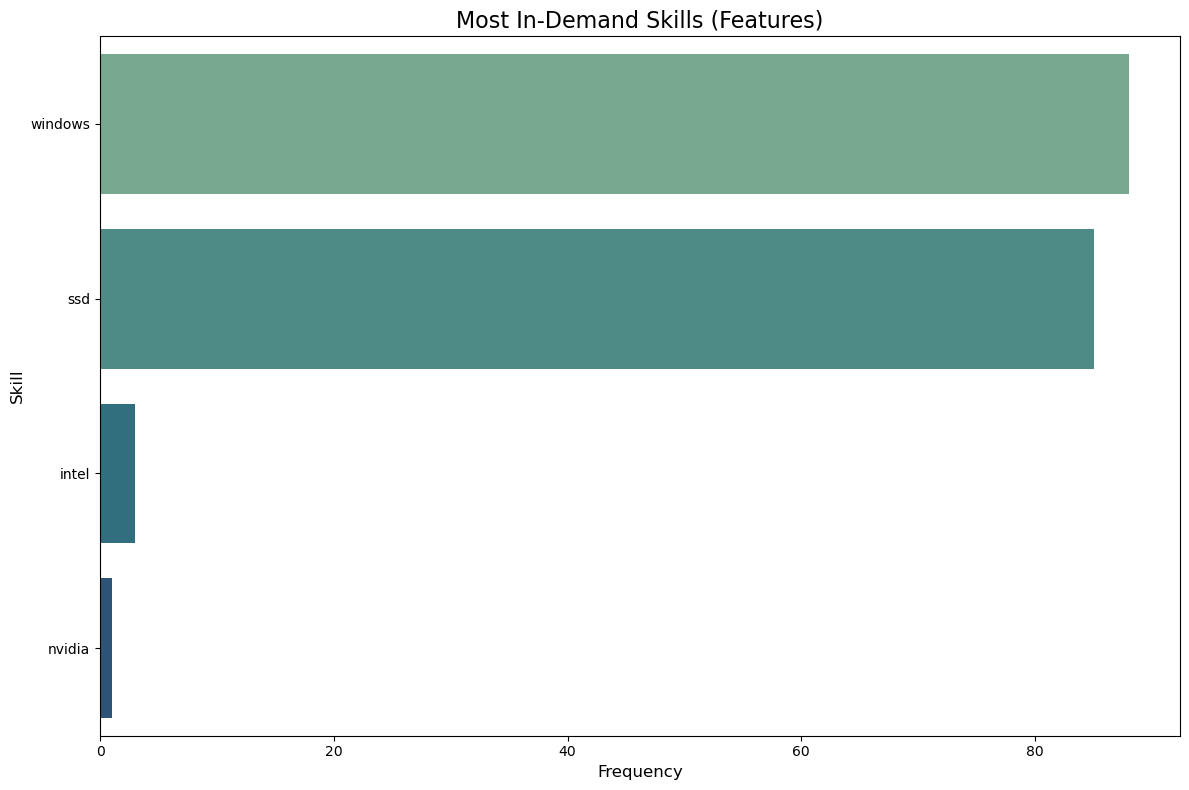

In [7]:
# b) Most Frequent Skills (Overall)
all_skills = [skill for sublist in df['skills'] for skill in sublist]
skill_counts = Counter(all_skills)
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency']).sort_values('Frequency', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Skill', data=skill_df, palette="crest")
plt.title('Most In-Demand Skills (Features)', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.tight_layout()
plt.show()

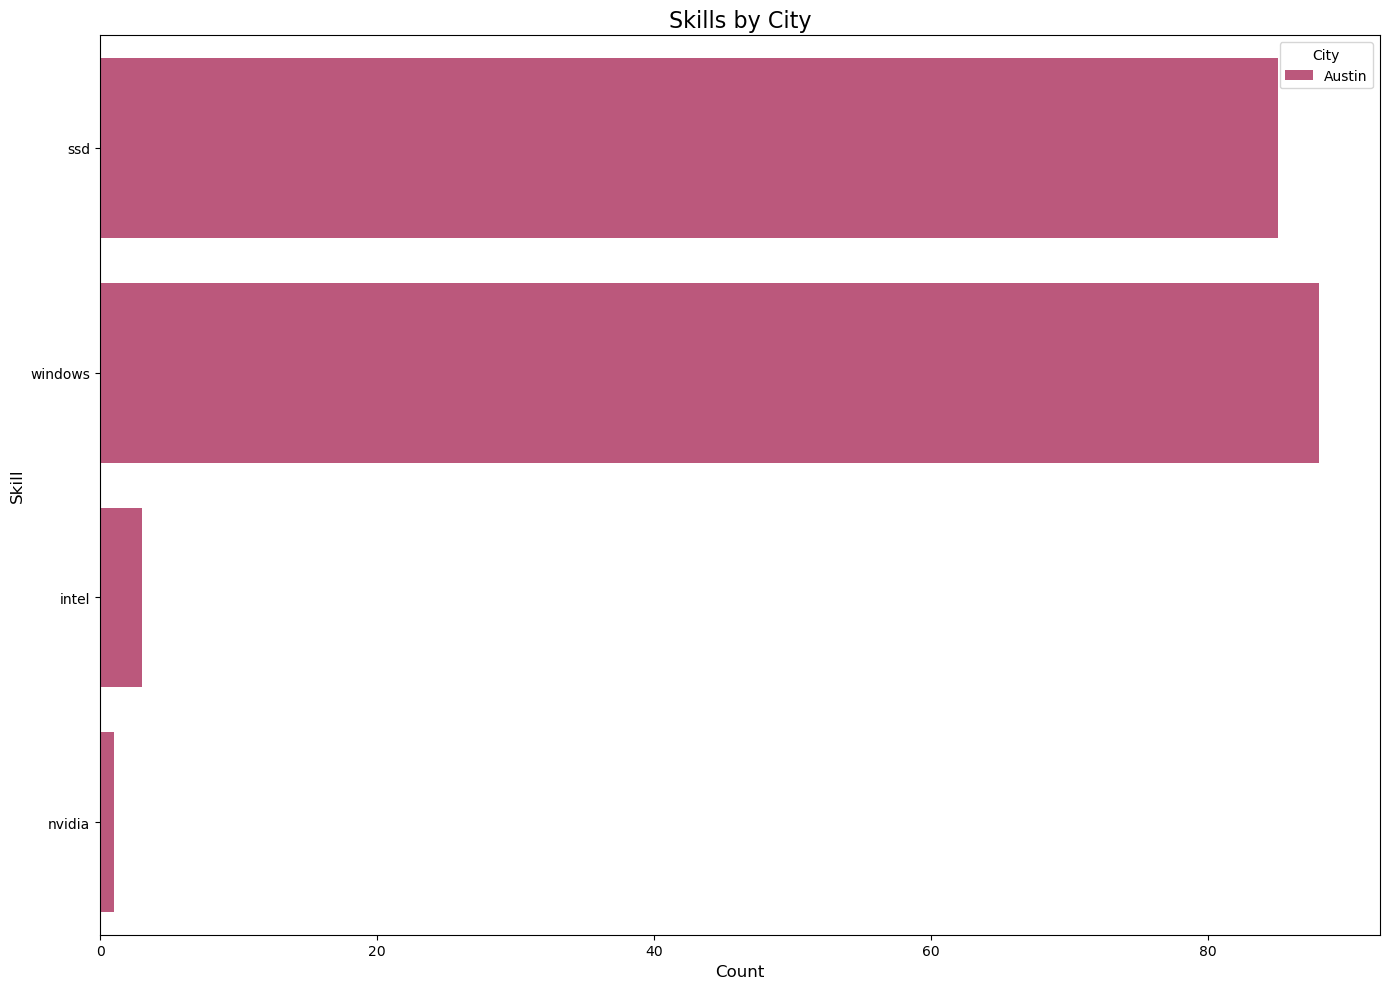

In [8]:
# c) Bonus: Most Frequent Skills by City
skills_by_city = df.explode('skills').dropna()
plt.figure(figsize=(14, 10))
sns.countplot(data=skills_by_city, y='skills', hue='location', palette='plasma')
plt.title('Skills by City', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.legend(title='City')
plt.tight_layout()
plt.show()